In [16]:
from POPSRegressor import POPSRegressor,DeterministicBayesianRidge
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [73]:
def fit_models(N,density=1.0):
    f = lambda x: (x**3+ 0.01* x**4)*0.1 + np.sin(x)*x*10. 
    x_train = np.append(np.random.uniform(-1, 1, N),np.linspace(-1,1,2)) * 10
    x_train = np.sort(x_train)
    
    x_dense = np.linspace(-1.1,1.1,51)* 10
    y_dense = f(x_dense)


    p = PolynomialFeatures(degree=4, include_bias=True)
    X_train = p.fit_transform(x_train.reshape(-1,1))
    X_dense = p.fit_transform(x_dense.reshape(-1,1))
    y_train = f(x_train)

    m = POPSRegressor(resampling_method='uniform')
    m.fit(X_train,y_train)

    y_pred,y_std,y_max,y_min = m.predict(X_dense,return_bounds=True)

    b = DeterministicBayesianRidge(fit_intercept=False)
    b.fit(X_train,y_train)
    b_pred,b_std = b.predict(X_dense,return_std=True)


    return X_dense.shape[1],x_dense,y_dense,x_train,y_train,y_pred,y_std,y_max,y_min,b_pred,b_std

def plot_panel(ax,x_dense,y_dense,x_train,y_train,y_pred,y_std,y_max,y_min,b_pred,b_std):
    ax.fill_between(x_dense,y_pred-3*y_std,y_pred+3*y_std,alpha=0.5,facecolor='C1',label='POPS')
    ax.plot(x_dense,y_pred,'C1-',lw=4)

    ax.fill_between(x_dense,b_pred-3*b_std,b_pred+3*b_std,alpha=0.5,facecolor='C2',label='Inference')
    ax.plot(x_dense,b_pred,'C2-',lw=2)
    ax.plot(x_train,y_train,'b.',label='Train')
    ax.plot(x_dense,y_dense,'k-',label='Truth')
    






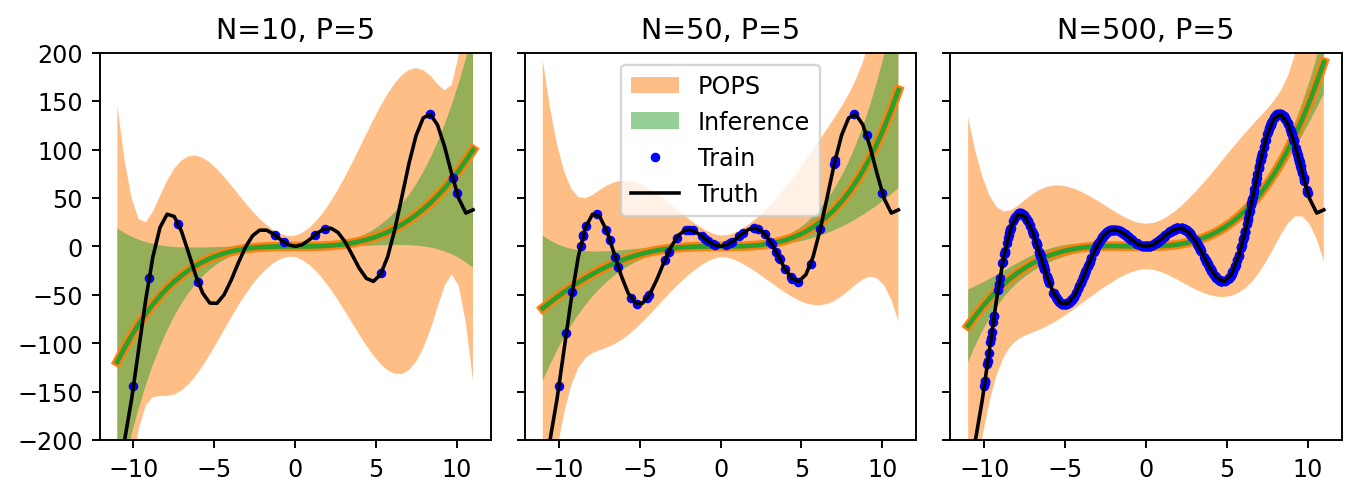

In [74]:
fig,axs = plt.subplots(1,3,figsize=(8,3),sharex=True,sharey=True,dpi=172)

for i,N in enumerate([10,50,500]):
    data = fit_models(N)
    axs[i].set_title(f"N={N}, P={data[0]}")
    plot_panel(axs[i],*data[1:])
    axs[i].set_ylim(-200,200)

axs[1].legend()
plt.tight_layout()
plt.show()